# Training Cats & Dogs classifier

## Downloading cats and dogs datasets

The cats vs. dogs dataset that we will use isn’t packaged with Keras. It was made available by Kaggle.com as part of a computer vision competition in late 2013, back when convnets weren’t quite mainstream. You can download the original dataset at: www.kaggle.com/c/dogs-vs-cats/data (you will need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless).


In [2]:
# imports
import sys
import os, shutil
import numpy as np

# keras imports 
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# utility functions
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

### Copying images to train, validation and test directories

In [2]:
def create_directory(path_to_dir):
    if not os.path.exists(path_to_dir): os.mkdir(path_to_dir)

# Download the data from kaggle website as mentioned above'
# extract all the zip files in dataset to the current folder
        
# The path to the directory where the original
# dataset was uncompressed

original_dataset_dir = '/home/sj-ai-lsb/Documents/datasets/dogs-vs-cats/train'
# The directory where we will
# store our smaller dataset
folder_path, _ = os.path.split(original_dataset_dir)
base_dir = folder_path + '/cats_and_dogs_small'
create_directory(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
create_directory(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
create_directory(validation_dir)
test_dir = os.path.join(base_dir, 'test')
create_directory(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
create_directory(train_cats_dir)
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
create_directory(train_dogs_dir)
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
create_directory(validation_cats_dir)
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
create_directory(validation_dogs_dir)
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
create_directory(test_cats_dir)
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
create_directory(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

print("\nCreated smaller version of dataset is stored @{}".format(base_dir))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 501
total test dog images: 500

Created smaller version of dataset is stored @/home/sj-ai-lsb/Documents/datasets/dogs-vs-cats/cats_and_dogs_small


## Instantiating a small convnet for cats vs. dogs classification

In [3]:
# model srchitecture development
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Using ImageDataGenerator to read images from directories & model training

<em>* reduce batch size if required</em>

In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size =512

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

nb_train_samples = utility_obj.count_files_in_directory(train_dir)
nb_valid_samples = utility_obj.count_files_in_directory(validation_dir)

print("\nModel training in progress..")
history = model.fit_generator(
      train_generator,
      steps_per_epoch= nb_train_samples // batch_size,
      epochs=30, verbose =0,
      validation_data=validation_generator,
      validation_steps=nb_valid_samples // batch_size)
print("Model training complete !!\n")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Model training in progress..
Model training complete !!



### Result

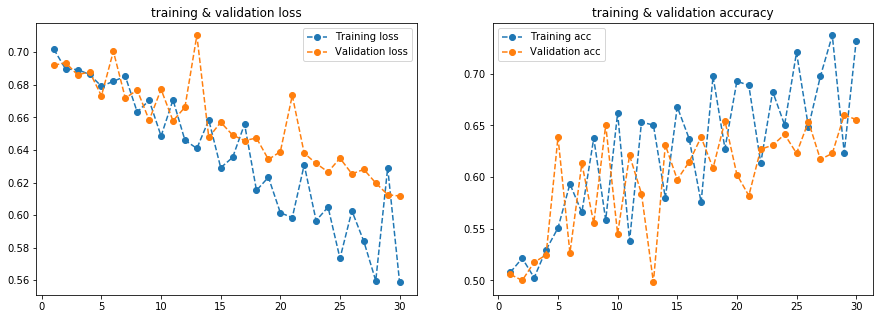

In [5]:
# ploting model training results
utility_obj.plot_training_history(history.history)

## Setting up a data augmentation configuration via ImageDataGenerator

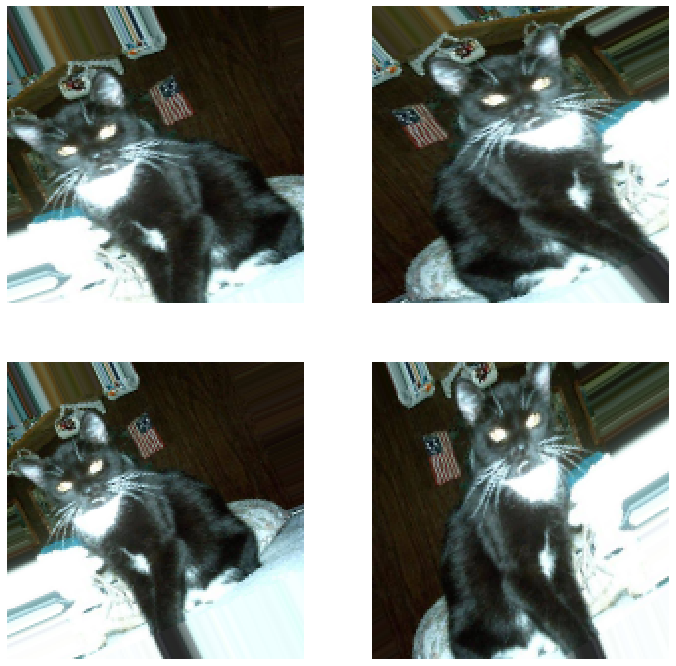

In [6]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# This is module with image preprocessing utilities
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x_ = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x_.reshape((1,) + x_.shape)
# The .flow() command below generates batches of randomly transformed images. # It will loop indefinitely, so we need to `break` the loop at some point! i= 0
i=0
plt.figure(figsize=(12,12))
for batch in datagen.flow(x, batch_size=1):
    ax = plt.subplot(2, 2, i + 1)
    ax.set_aspect('equal')
    plt.axis("off")
    ax.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break        
plt.show()
plt.close()

## Defining a new convnet that includes dropout & training with augmented data

<em>* reduce batch size if required</em>

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))   # controls regularisation to prevent overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# choose a batch size as per system configuration 
batch_size = 512

# Training our convnet using data augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


nb_train_samples = utility_obj.count_files_in_directory(train_dir)
nb_valid_samples = utility_obj.count_files_in_directory(validation_dir)

print("\nModel training in progress..")
history = model.fit_generator(
      train_generator,
      steps_per_epoch= nb_train_samples // batch_size,
      epochs=60, verbose =0,
      validation_data=validation_generator,
      validation_steps=nb_valid_samples // batch_size)
print("Model training complete !!\n")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Model training in progress..
Model training complete !!



### Result

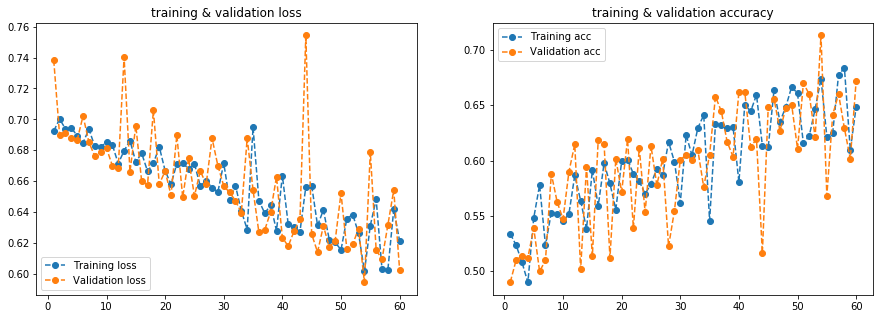

In [8]:
# ploting model training results
utility_obj.plot_training_history(history.history, chart_type="--o")

########### save the model #################
model.save('cats_and_dogs_small_2.h5')
############################################